<a href="https://colab.research.google.com/github/jaylinbarry/Stat/blob/main/Jaylin_Barry_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

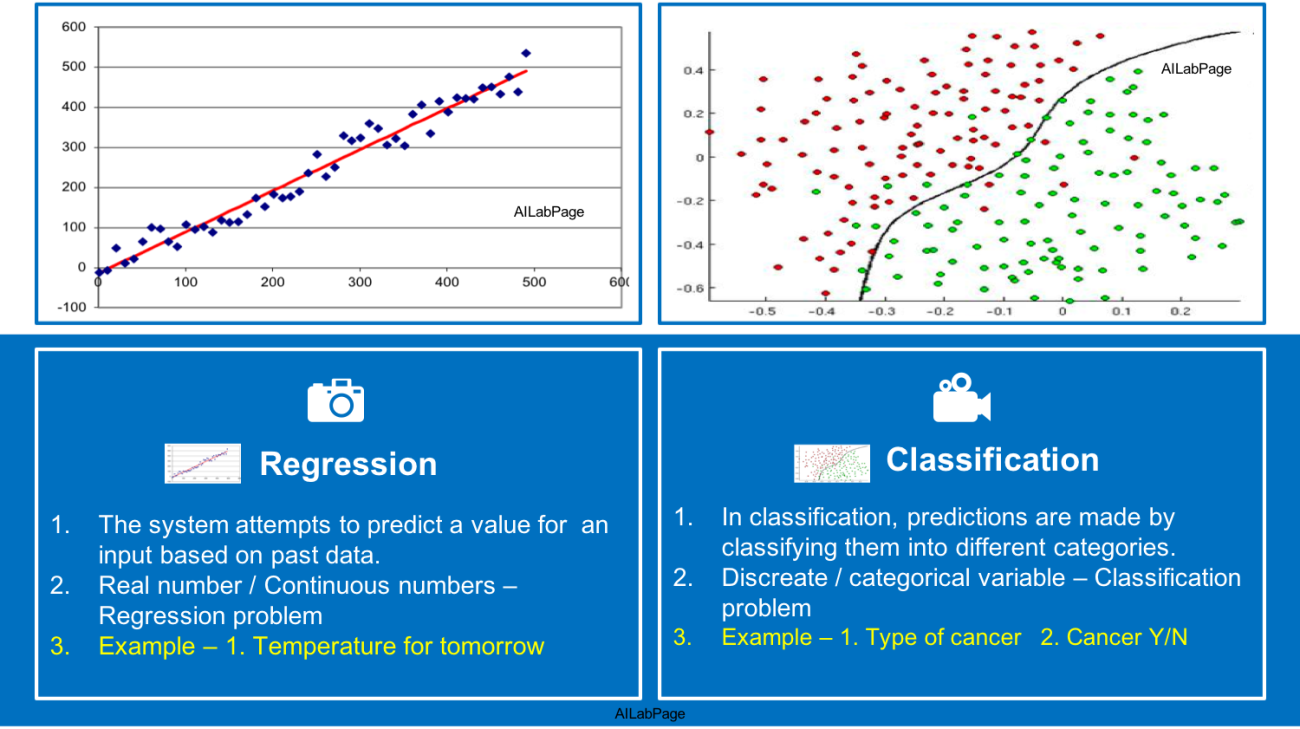

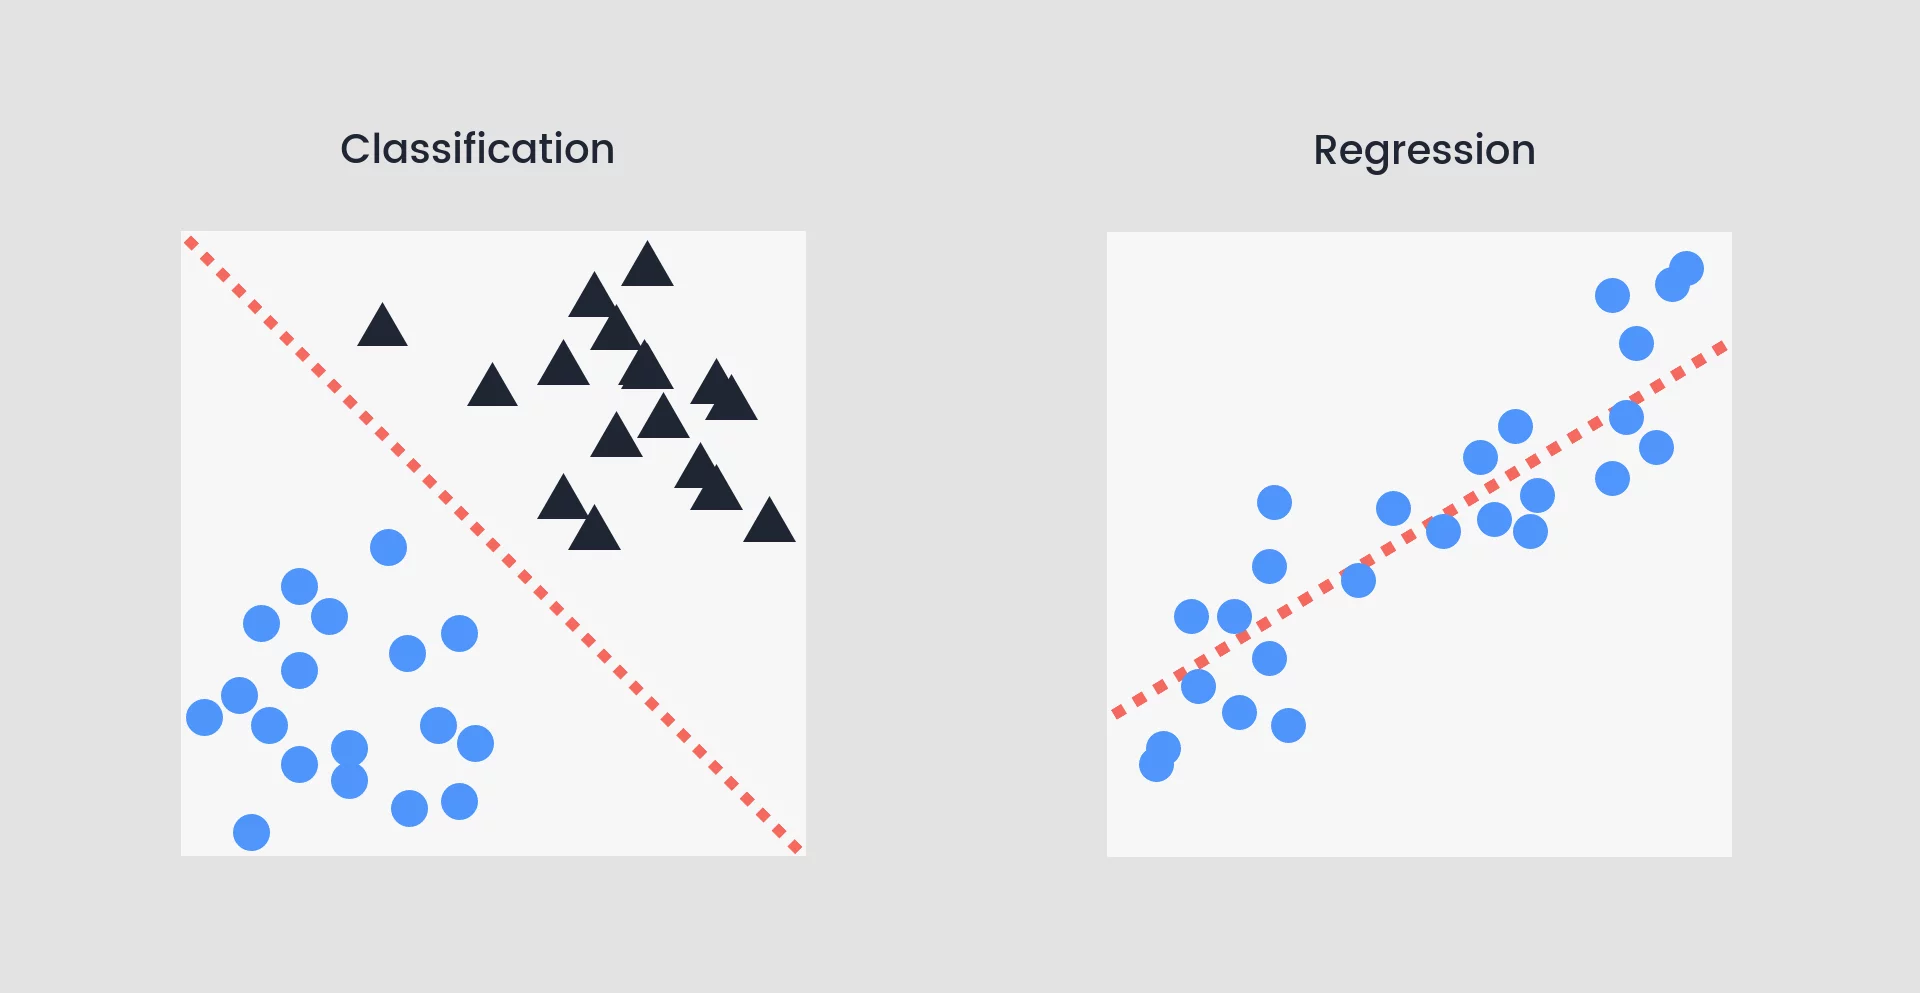

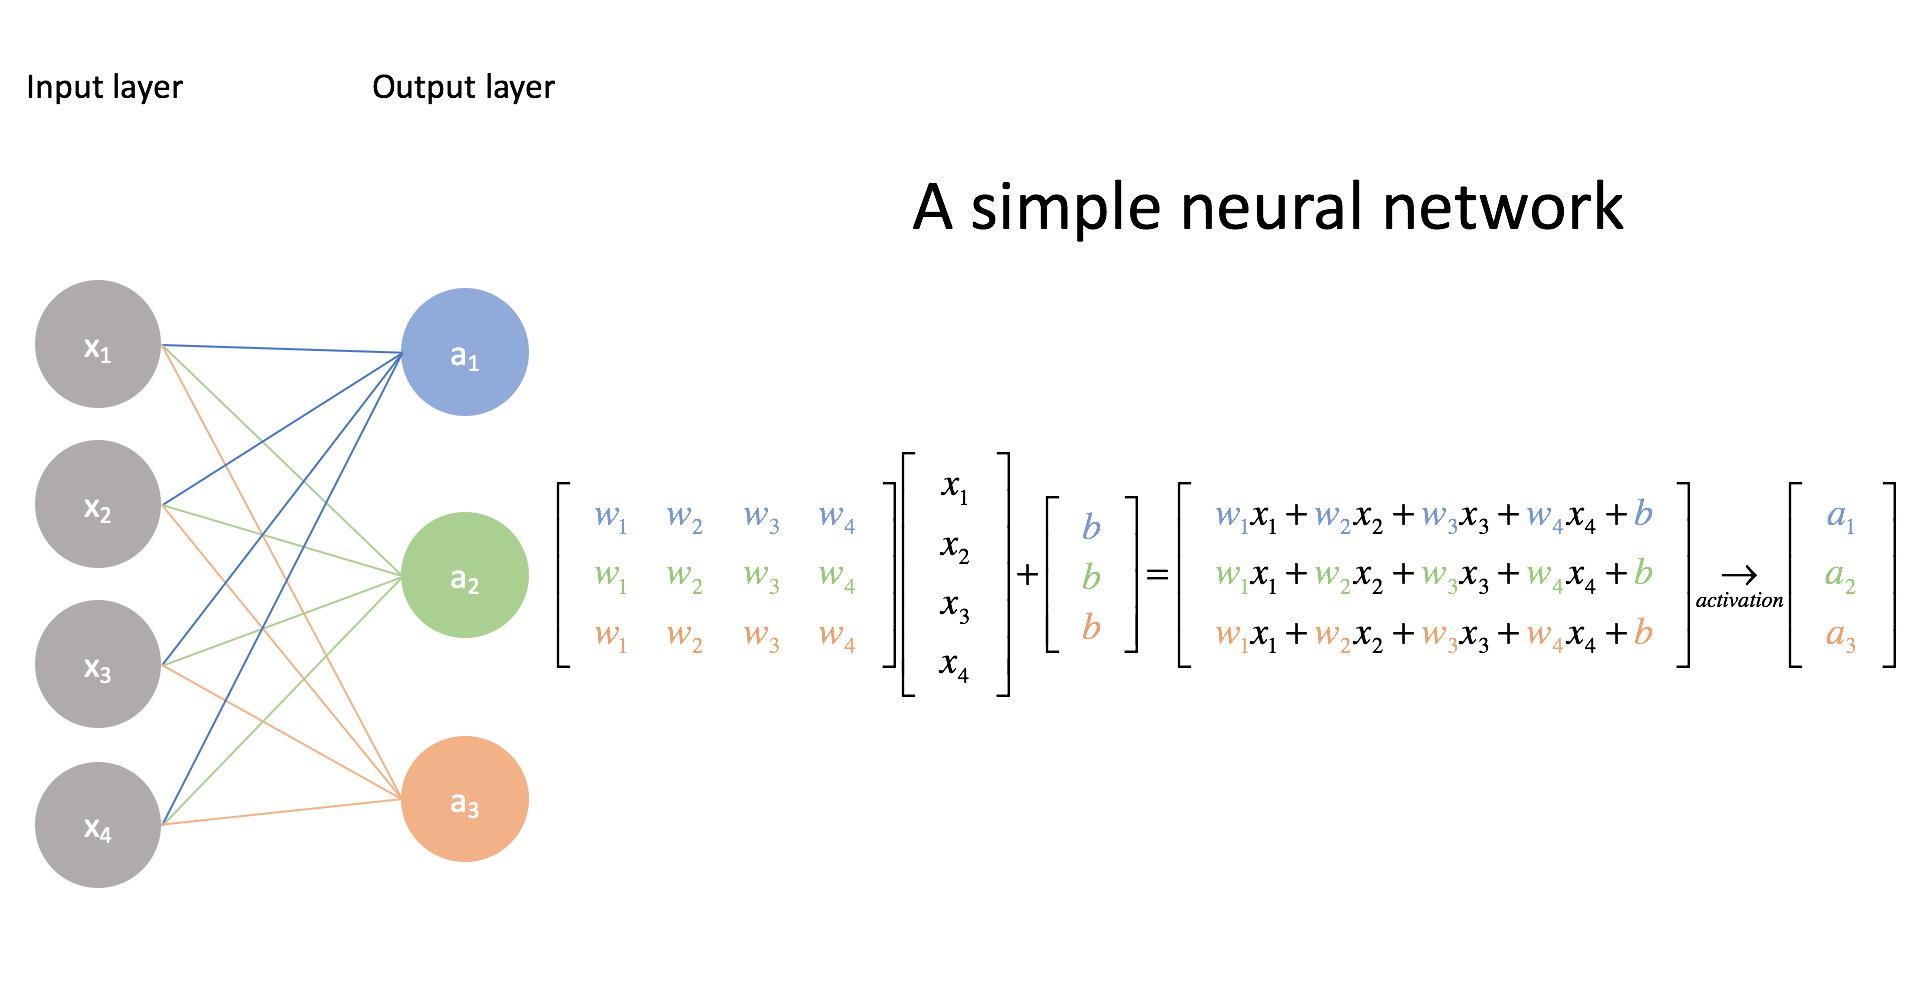

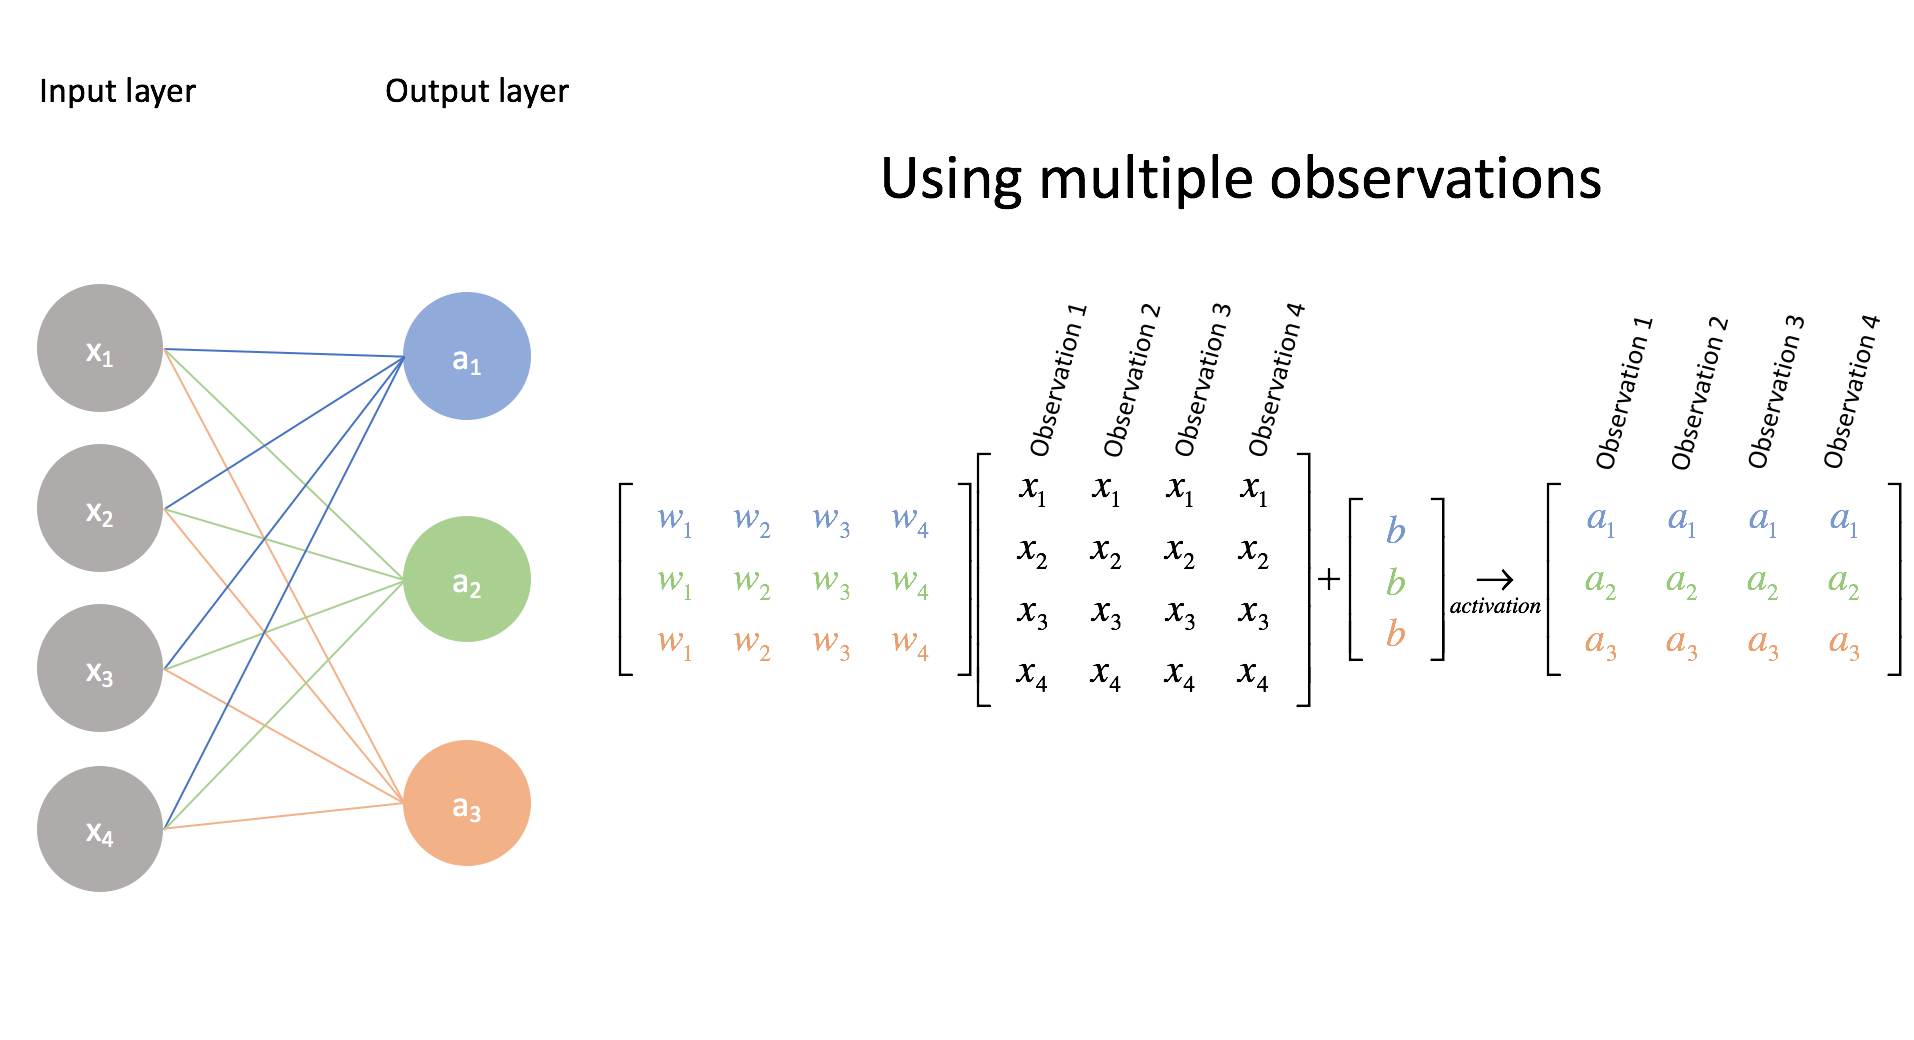

In [115]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn
#importing a bunch of codes to use

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-nrgkz82q
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-nrgkz82q
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# $y=mx+b$

In [116]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()
    #defining the plot and its images axis and figures

In [117]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))
    #defining montage plot with its x values

In [118]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2
    #defining one hot with its y2 values and its range available

In [119]:
##MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = datasets.FashionMNIST('./data', train=True, download=True)
# test_set = datasets.FashionMNIST('./data', train=False, download=True)

In [120]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
#defining the x and y values with its test of each also

In [121]:
X.shape
#outputting the x shape value we defined above

(60000, 1, 28, 28)

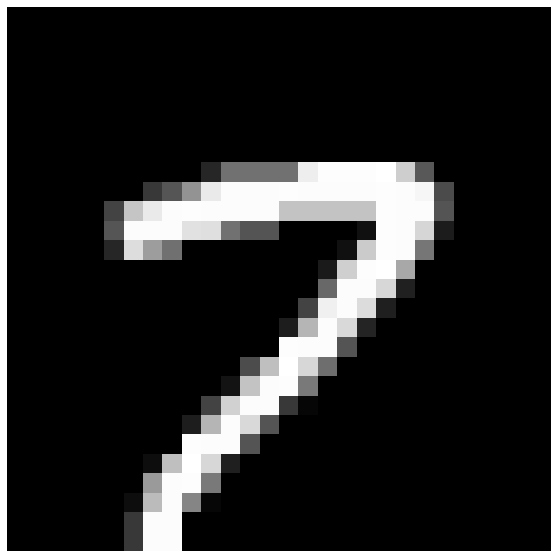

In [122]:
plot(X[123,0,0:28,0:28])
#plotting all of the points from above with 28 by 28 dimensions

In [123]:
Y[123]
#outputting y in regaurds to 123

7

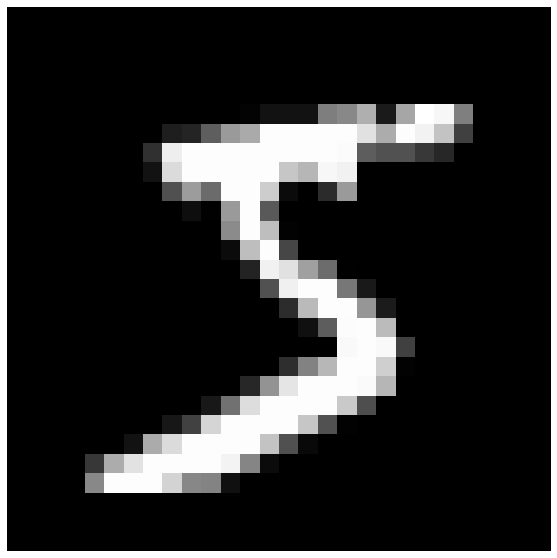

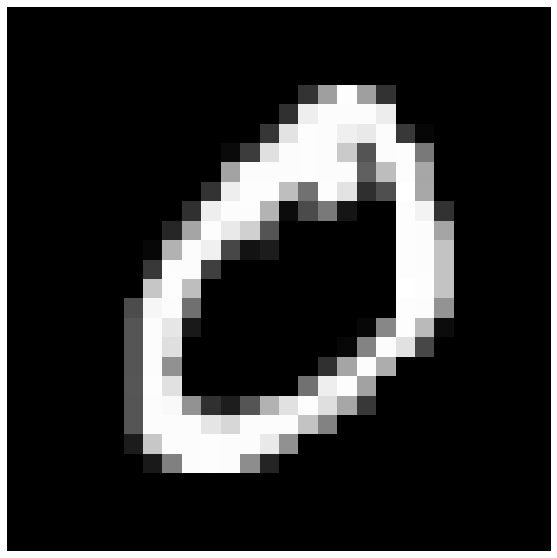

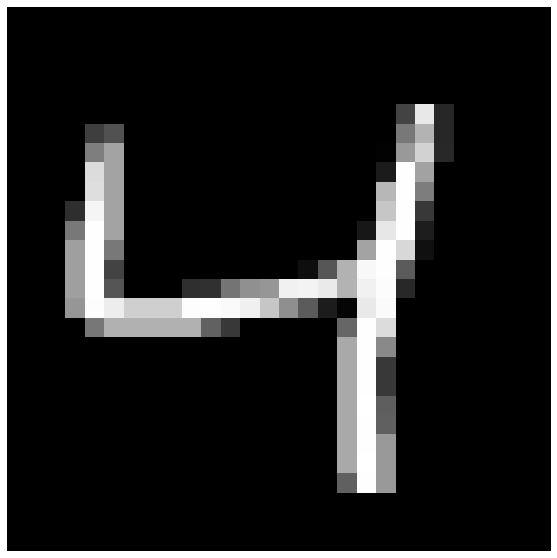

In [124]:
for i in range(3):
    plot(X[i,0,:,:])
    #plotting the points in the range of 3 in regaurds to 0

In [125]:
Y
#outputting the y value we defined above

array([5, 0, 4, ..., 5, 6, 8])

In [126]:
X[0:25,0,:,:].shape
#outputting the x shape in regards to 25

(25, 28, 28)

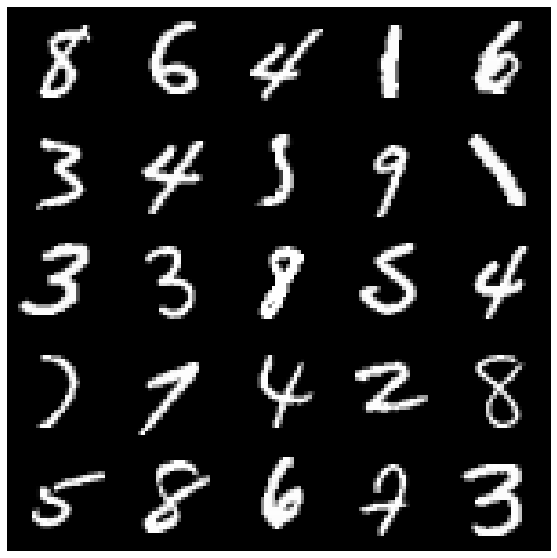

In [127]:
montage_plot(X[125:150,0,:,:])
#plotting all the points together with 125 by 150 dimensions

In [128]:
X.shape[0]
#outputting the x shape in regards to 0

60000

In [129]:
X_test.shape
#outputting the x test shape as defined above

(10000, 1, 28, 28)

In [130]:
X.shape[0]
#outputting the x shape in regards to 0

60000

In [131]:
X_test.shape[0]
#outputting x test shape in regards to 0

10000

In [132]:
28*28
#calculating 28 by 28

784

In [133]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)
#defining x as x reshape, being x shape in ragrds to 784 and x test and x test reshape

In [134]:
X.shape,X_test.shape
#outputting x shape and x test shape as defined above

((60000, 784), (10000, 784))

In [135]:
X[0]
#outting te array of x in regards to 0

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

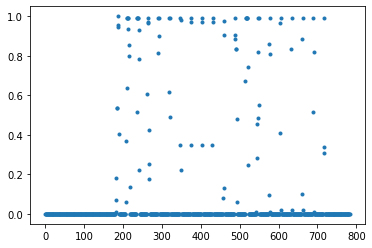

In [136]:
plt.plot(X[100],'.')
#graphing the data points from above in regards to 100 in a plot graph

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

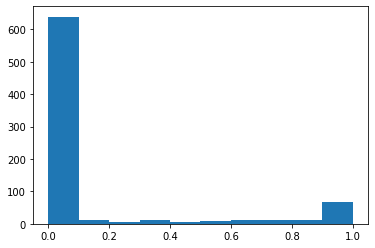

In [137]:
plt.hist(X[0])
#graphing the same data from above but in a histogram in regards to 0

In [138]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)
#redefining x xtest y and y test using the GPU data

In [139]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'  
wget.download(url,"W.data")
#uploading and downloading a url as W.data

'W (2).data'

In [140]:
W = torch.load("W.data")
#defining W as the torch load from the url

In [141]:
W.shape
#outputting w shape as defined above

torch.Size([784, 10])

In [142]:
X.shape
#outputting x shape as defined above

torch.Size([60000, 784])

In [143]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()
    #defining plot using the torch tenchor from above giving it axis and dimensions

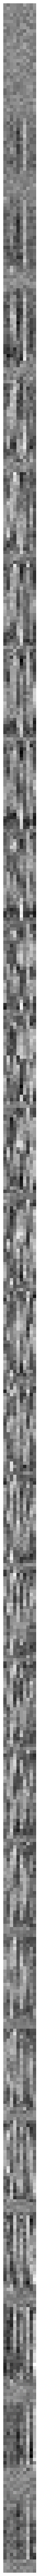

In [144]:
plot(W[0:784,:10])
#plotting the points of w in regards to 784 and 10

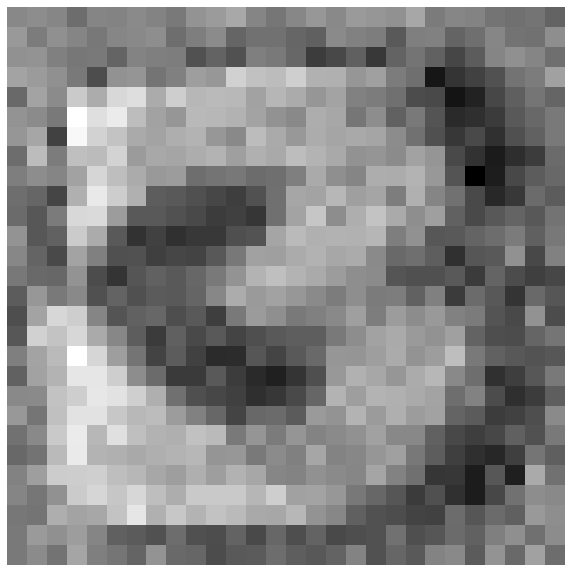

In [145]:
plot(W[:,3].reshape(28,28))
#plotting the same data points from above but now with the dimensions of 28 by 28

In [146]:
X.shape
#outputting x shape as defined above

torch.Size([60000, 784])

In [147]:
b = 40

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
    #defining b and the outputs of b as either train or test 

In [148]:
x,y = get_batch('train')
#defining x,y as the get batch of train from above

In [149]:
x.shape
#outputting x shape as defined above

torch.Size([40, 784])

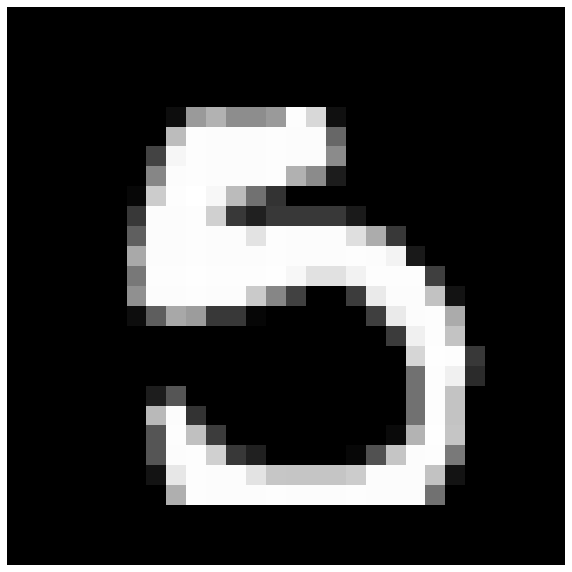

In [150]:
plot(x[0].reshape(28,28))
#plotting the points from above of x in regards to 0 with 28 by 28 dimensions

In [151]:
y
#outputting the values of y

tensor([5., 9., 0., 4., 2., 2., 2., 8., 0., 2., 3., 5., 3., 1., 0., 0., 6., 5.,
        6., 0., 1., 6., 9., 2., 3., 3., 7., 6., 1., 9., 0., 0., 2., 1., 7., 2.,
        9., 3., 2., 4.], device='cuda:0')

In [152]:
x.shape, W.shape
#outputting x shape and w shape as defined above

(torch.Size([40, 784]), torch.Size([784, 10]))

In [153]:
torch.matmul(x,W).shape
#outputting the shaoe of torch matmul in regards to x and w as defined above

torch.Size([40, 10])

In [154]:
(x@W).shape
#outputting x@w shape values as defined above

torch.Size([40, 10])

In [155]:
y = x@W
#defining y as x@w

In [156]:
y.shape
#outputting y shape as defined above

torch.Size([40, 10])

In [157]:
y
#out putting the new values of y as redefined above

tensor([[-1.6821e+00, -1.9977e+01, -1.2717e+01,  2.2584e+00, -9.7887e-01,
          1.4052e+01, -1.0467e+01, -4.5690e+00,  6.8287e+00,  2.7914e+00],
        [-2.8454e+00, -1.4559e+01, -4.3132e+00, -7.7052e+00,  1.6564e+00,
         -6.8704e+00, -2.8581e+00,  4.7935e+00, -1.7678e+00,  9.3777e+00],
        [ 9.0610e+00, -1.4300e+01, -6.6915e+00, -7.9285e+00, -6.8740e+00,
         -7.9700e-01,  1.0793e+00, -5.8491e-01, -5.4143e+00, -9.0960e+00],
        [-3.5215e+00, -5.5613e+00, -2.6671e+00, -9.9561e-01,  6.8074e+00,
         -4.7160e+00,  1.5683e+00, -2.9593e+00, -1.2229e+00,  4.8892e+00],
        [ 4.9174e-01, -1.6111e-01,  7.6584e+00,  6.5114e+00, -1.3331e+01,
         -1.5875e-01,  3.0218e+00, -1.2709e+01,  7.0399e-01, -9.3109e+00],
        [ 4.2034e+00, -1.5417e+01,  5.7593e+00,  7.8123e+00, -3.1860e+00,
          2.1711e+00, -3.2194e+00, -7.1160e+00,  1.3655e+00, -7.3227e+00],
        [ 1.9675e+00, -6.8044e+00, -4.9001e+00, -9.3392e+00,  2.5940e+00,
         -1.0365e+01,  2.8669e+0

In [158]:
torch.argmax(y,1)
#outputting torch argmax in regards to y, 1

tensor([5, 9, 0, 4, 2, 3, 8, 8, 0, 2, 2, 8, 3, 1, 0, 0, 5, 5, 1, 0, 1, 6, 9, 2,
        3, 3, 7, 6, 1, 9, 0, 0, 2, 1, 7, 4, 9, 3, 2, 4], device='cuda:0')

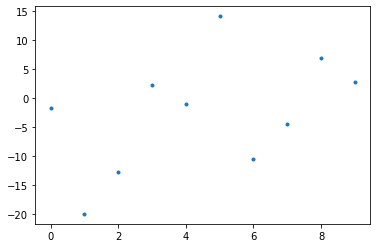

In [159]:
plt.plot(y[0].cpu().detach().numpy().T,'.')
#graphing the points from above in a plot graph

https://eleif.net/clicktimer.html

In [160]:
x@W
#outputting the array that is defined as x@w

tensor([[-1.6821e+00, -1.9977e+01, -1.2717e+01,  2.2584e+00, -9.7887e-01,
          1.4052e+01, -1.0467e+01, -4.5690e+00,  6.8287e+00,  2.7914e+00],
        [-2.8454e+00, -1.4559e+01, -4.3132e+00, -7.7052e+00,  1.6564e+00,
         -6.8704e+00, -2.8581e+00,  4.7935e+00, -1.7678e+00,  9.3777e+00],
        [ 9.0610e+00, -1.4300e+01, -6.6915e+00, -7.9285e+00, -6.8740e+00,
         -7.9700e-01,  1.0793e+00, -5.8491e-01, -5.4143e+00, -9.0960e+00],
        [-3.5215e+00, -5.5613e+00, -2.6671e+00, -9.9561e-01,  6.8074e+00,
         -4.7160e+00,  1.5683e+00, -2.9593e+00, -1.2229e+00,  4.8892e+00],
        [ 4.9174e-01, -1.6111e-01,  7.6584e+00,  6.5114e+00, -1.3331e+01,
         -1.5875e-01,  3.0218e+00, -1.2709e+01,  7.0399e-01, -9.3109e+00],
        [ 4.2034e+00, -1.5417e+01,  5.7593e+00,  7.8123e+00, -3.1860e+00,
          2.1711e+00, -3.2194e+00, -7.1160e+00,  1.3655e+00, -7.3227e+00],
        [ 1.9675e+00, -6.8044e+00, -4.9001e+00, -9.3392e+00,  2.5940e+00,
         -1.0365e+01,  2.8669e+0

In [161]:
y2 = x@W 
#defining y2 as x@W

In [162]:
y2.shape
#outputting the new y2 shape as defiend aboe

torch.Size([40, 10])

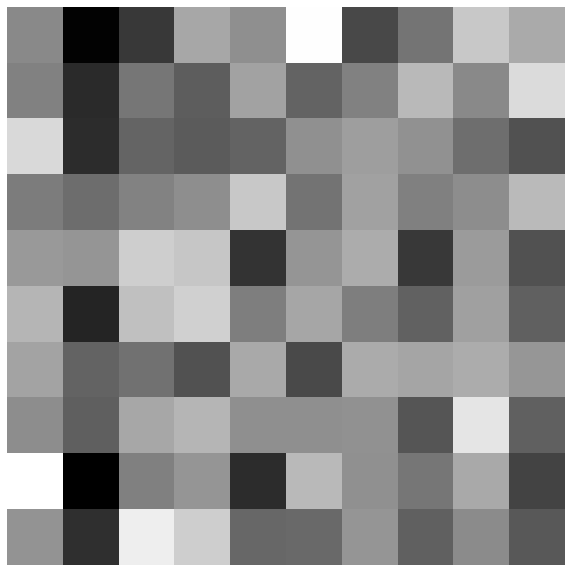

In [163]:
plot(y2[0:10,:])
#plotting the points from above with dimensions of 10

In [164]:
y
#outputting the newly defined values of y 

tensor([[-1.6821e+00, -1.9977e+01, -1.2717e+01,  2.2584e+00, -9.7887e-01,
          1.4052e+01, -1.0467e+01, -4.5690e+00,  6.8287e+00,  2.7914e+00],
        [-2.8454e+00, -1.4559e+01, -4.3132e+00, -7.7052e+00,  1.6564e+00,
         -6.8704e+00, -2.8581e+00,  4.7935e+00, -1.7678e+00,  9.3777e+00],
        [ 9.0610e+00, -1.4300e+01, -6.6915e+00, -7.9285e+00, -6.8740e+00,
         -7.9700e-01,  1.0793e+00, -5.8491e-01, -5.4143e+00, -9.0960e+00],
        [-3.5215e+00, -5.5613e+00, -2.6671e+00, -9.9561e-01,  6.8074e+00,
         -4.7160e+00,  1.5683e+00, -2.9593e+00, -1.2229e+00,  4.8892e+00],
        [ 4.9174e-01, -1.6111e-01,  7.6584e+00,  6.5114e+00, -1.3331e+01,
         -1.5875e-01,  3.0218e+00, -1.2709e+01,  7.0399e-01, -9.3109e+00],
        [ 4.2034e+00, -1.5417e+01,  5.7593e+00,  7.8123e+00, -3.1860e+00,
          2.1711e+00, -3.2194e+00, -7.1160e+00,  1.3655e+00, -7.3227e+00],
        [ 1.9675e+00, -6.8044e+00, -4.9001e+00, -9.3392e+00,  2.5940e+00,
         -1.0365e+01,  2.8669e+0

In [165]:
one_hot(y)

/usr/local/lib/python3.8/dist-packages/mpcr/__init__.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


ValueError: ignored

In [ ]:
plot(one_hot(y))

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

In [ ]:
torch.argmax(y2,1)

In [ ]:
b

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

In [ ]:
X.shape

In [ ]:
%%timeit
X[20000]@W

In [ ]:
torch.argmax(X@W,1)

In [ ]:
Y

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

In [ ]:
X@W

In [ ]:
W.shape

In [ ]:
W[:,0].shape

In [ ]:
plot(W[:,0].reshape(28,28))

In [ ]:
plot(W[:,9].reshape(28,28))

In [ ]:
W.shape

In [ ]:
(W.T).shape

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 1000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    # if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

#Generator

In [166]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)
    #defining random truncated and all of its variables, mu sigma and R

In [167]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
    #defining GPU and its data in regards of torch tensor

In [168]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()
    #defining plot and its axis figure and dimensions

In [169]:
batch_size = 512
#defining batch size as 512

In [170]:
# #MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
# train_set = datasets.KMNIST('./data', train=True, download=True)
# test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [171]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5
#defining x xtest y and y test

In [172]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]
#defining n as 7 and its variables including index

In [173]:
X.shape,Y.shape,X_test.shape,Y_test.shape
#outputting the values of x shape y shape x test and y test

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [174]:
###################################################

In [175]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
    #defining GPU and all of its data in regards to torch tensor

In [176]:
X = GPU_data(X)
X_test = GPU_data(X_test)

Y = GPU_data(Y)
Y_test = GPU_data(Y_test)
#defining x and y and their tests in regards to GPU and its data 

In [177]:
X = (X + 1)/2
X_test = (X_test + 1)/2
#defining x and x plus one divided by 2 and x test as x test plus 1 divided by 2

In [178]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y
    #defining the get batch and its two variables of train and test including each of its data and dimensions

In [179]:
x,y = get_batch('train')
#defining x,y as get batches train data

(array([286228.,  13038.,  10529.,   9795.,  10262.,  10516.,  13890.,
         18030.,  19264.,   9856.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

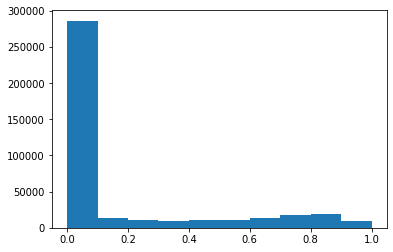

In [180]:
plt.hist(x.flatten().cpu().numpy())
#graphing the data from above in a histogram

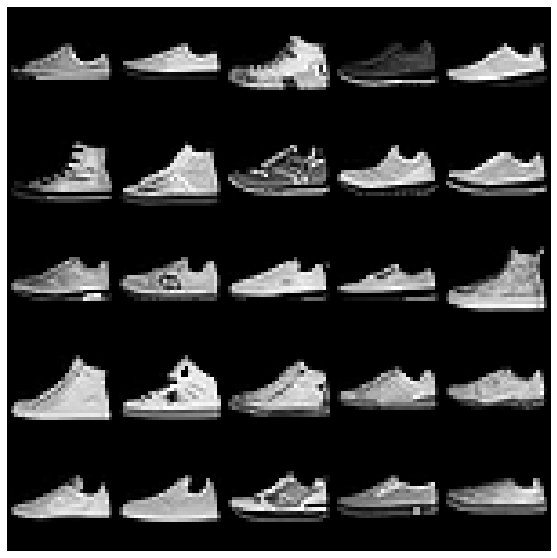

In [181]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())
#plotting all of the data together into one image

In [182]:
X = X.view(-1,784)
X_test = X_test.view(-1,784)

def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y
    #defining x and the train and test values to include all of the data within the whole code

In [183]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#defining device as the torch device to include all torch cuda available

In [184]:
def MSE(image_batch_recon, image_batch):
    return torch.mean((image_batch_recon - image_batch)**2)
    #defining MSE and its torch mean as the image batch multiplied by 2

In [185]:
def Encoder(x,w):
    return x@w[0]
    #defining encorder to be the x@w return

In [186]:
def Decoder(x,w):
    return x@(w[0].T)
    #defining the decoder as the x@w in regards to 0

In [187]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)
    #defining autoencoder as the decoder multiplied by the encoder

In [188]:
batch_size = 512
steps = 10000
learning_rate = 4e-3
#defining batch size, steps and learning rate with its numerical values

In [189]:
w0 = GPU(randn_trunc((784,78)))
w = [w0]

optimizer = torch.optim.Adam(params=w, lr=learning_rate, weight_decay=1e-5)

for step in range(steps):
        
    x,y = get_batch('train')
    
    # autoencoder reconstruction
    x2 = Autoencoder(x,w)
    
    # reconstruction error
    loss = MSE(x2, x)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    if step % 1000 == 0:
        print(loss.item())

0.4882254898548126
0.004640576895326376
0.003803398460149765
0.003262801095843315
0.0036475579254329205
0.0033439621329307556
0.0034461538307368755
0.003104953095316887
0.0032553356140851974
0.0033286199904978275


In [190]:
# batch_size = 16

In [216]:
x,y = get_batch('test')
#defining x,y as the get batch test variable

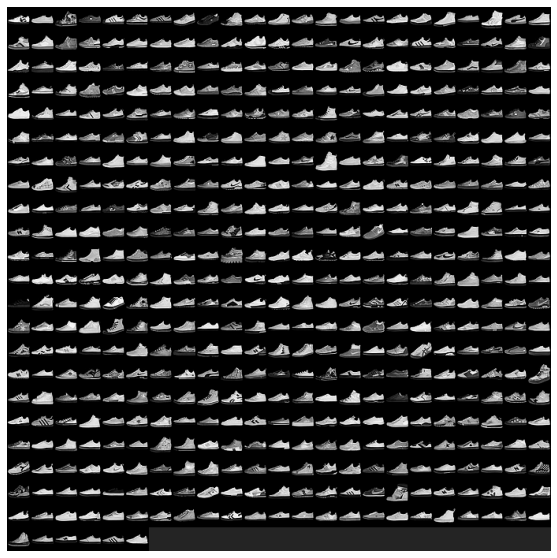

In [192]:
montage_plot(x.reshape(-1,28,28).detach().cpu().numpy())
#plotting all of the points rejoined otgether from above into a 28 by 28 dimensions square image

In [193]:
x.shape
#outputting the new defined x shape

torch.Size([512, 784])

In [194]:
Decoder(Encoder(x,w),w).shape
#outputting decoder as defined above

torch.Size([512, 784])

In [195]:
x2 = Autoencoder(x,w)
#defining x2 as the autoencoder as defined above

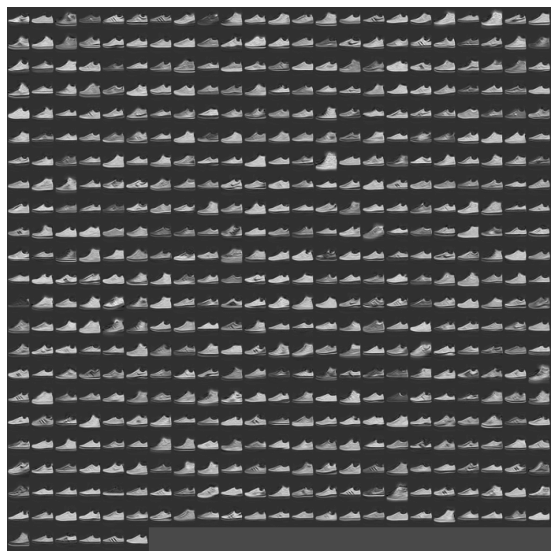

In [196]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())
#replotting all of the new data from above into a image like before with 28 by 28 dimensions, in regards to the data multiplied by 2

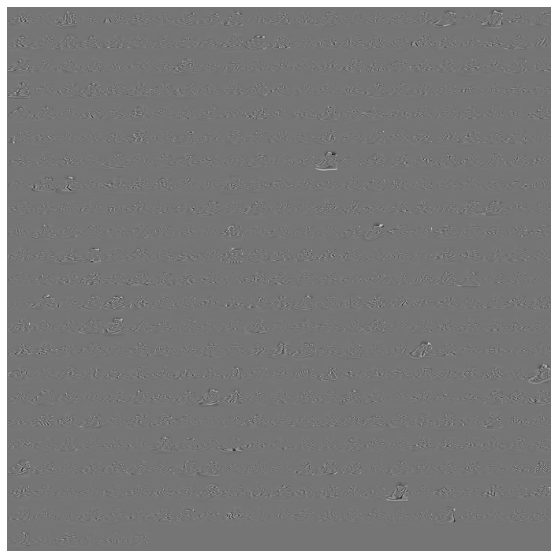

In [197]:
montage_plot((x-x2).reshape(-1,28,28).detach().cpu().numpy())
#plotting the same points as above to an image in regards to the values being subtracted by x 

In [198]:
w[0].shape
#outputting the value of w in regards to 0

torch.Size([784, 78])

In [199]:
wp = w[0].T 
#defining wp as the values above

In [200]:
wp = wp.reshape(-1,28,28)
#redefining wp as the reshape of the values above

In [201]:
wp.shape
#outputting the values of wp shape as defined above

torch.Size([78, 28, 28])

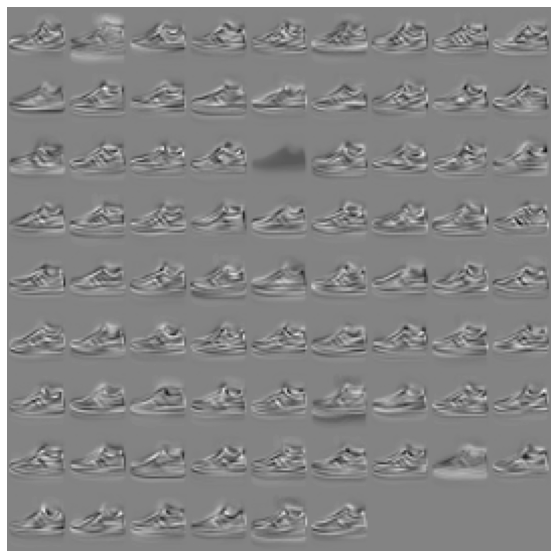

In [202]:
montage_plot(wp.detach().cpu().numpy())
#plotting all of the data from above into a new image

In [203]:
x.shape
#outputting the values of x shape as defined above

torch.Size([512, 784])

In [204]:
x = x[0:1]
#defining x and the original values of x in regards to 1

In [205]:

y = Encoder(x,w)
#defining y as the encoder values from before

In [206]:
y.shape
#outputting the values of y shape as defined before

torch.Size([1, 78])

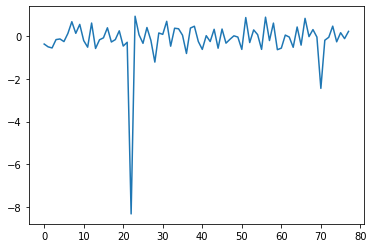

In [207]:
plt.plot(y[0].cpu().detach().numpy())
#graphing all of the new values into a plot graph

In [208]:
noise = 0.5*np.random.randn(78)
#defining noise as the random number of 78 multilplied by .5

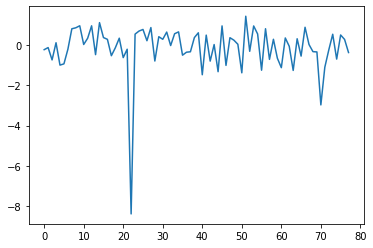

In [209]:
plt.plot(y[0].cpu().detach().numpy() + noise)
#graphing al of the new data points from above into a plot graph

In [210]:
noise
#outputting noise as defined above

array([ 0.14705429,  0.38133573, -0.17884816,  0.28315425, -0.85654041,
       -0.67231422, -0.32698215,  0.14060886,  0.7329797 ,  0.41482085,
        0.24287537,  0.8596594 ,  0.35083033,  0.1070018 ,  1.29103912,
        0.45801249, -0.09878942, -0.2482844 ,  0.0313081 ,  0.0991472 ,
       -0.15183554,  0.0858582 , -0.07082611, -0.37935503,  0.63984997,
        1.11689762, -0.1816291 ,  1.07283716,  0.42654339,  0.27350689,
        0.20973984, -0.04115286,  0.45180235,  0.19811453,  0.31715082,
       -0.53996548,  0.46199833, -0.70416786, -0.085296  ,  0.86722948,
       -0.84764437,  0.47858672, -0.53898166, -0.28793295, -0.75130968,
        0.6261182 , -0.67433697,  0.51937214,  0.23375439,  0.08928815,
       -0.75202079,  0.56859606, -0.00363346,  0.66254228,  0.48686276,
       -0.62360043, -0.06887916, -0.49751359, -0.31593694, -0.01527806,
       -0.55630396,  0.30940971, -0.01301164, -0.7313893 , -0.1073032 ,
       -0.12182958,  0.05884501,  0.056606  , -0.62628515, -0.29

In [211]:
noise = GPU(noise)
#defining noise to be euqal to GPU noise 

In [212]:
x2 = Decoder(y+noise,w)
#defining x2 as the decoder values

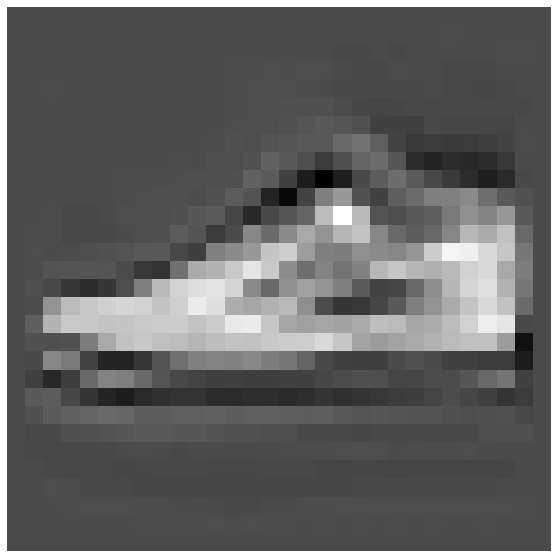

In [213]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())#
#plotting all of the new points into an image 

In [214]:
x2 = Decoder(y,w)

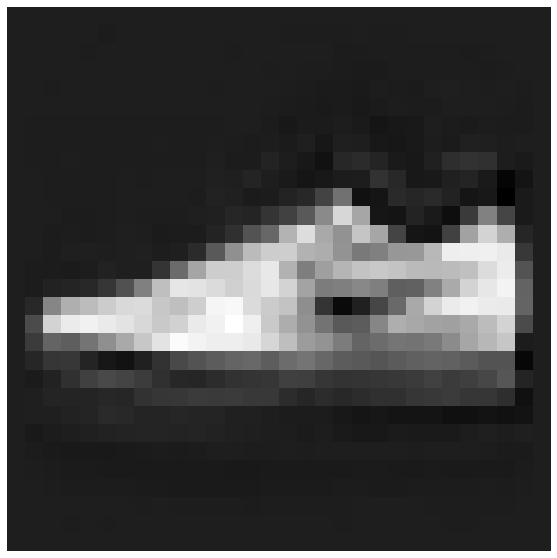

In [215]:
montage_plot(x2.reshape(-1,28,28).detach().cpu().numpy())